In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential


In [44]:
csv_data = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(csv_data,
                   header=None,
                   index_col=None,
                   na_values='?')
df.columns = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal',
    'num']

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


1. **age**<br>
age in years
2. **sex**<br>
sex (1 = male; 0 = female)
3. **cp**<br>
chest pain type
 - Value 1: typical angina
 - Value 2: atypical angina
 - Value 3: non-anginal pain
 - Value 4: asymptomatic
4. **trestbps**<br>
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**<br>
chol: serum cholestoral in mg/dl
6. **fbs**<br>
fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. **restecg**<br>
restecg: resting electrocardiographic results
 - Value 0: normal
 - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**<br>
thalach: maximum heart rate achieved
9. **exang**<br>
exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**<br>
ST depression induced by exercise relative to rest
11. **slope**<br>
the slope of the peak exercise ST segment
 - Value 1: upsloping
 - Value 2: flat
 - Value 3: downsloping
12. **ca**<br>
number of major vessels (0-3) colored by flourosopy
13. **thal**<br>
3 = normal; 6 = fixed defect; 7 = reversable defect
14. **num**<br>
diagnosis of heart disease (angiographic disease status)
 - Value 0: < 50% diameter narrowing
 - Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [45]:
df.dropna(inplace=True)
df['num'] = df['num'].replace([2,3,4], 1)
df.info

<bound method DataFrame.info of       age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
5    56.0  1.0  2.0     120.0  236.0  0.0      0.0    178.0    0.0      0.8   
6    62.0  0.0  4.0     140.0  268.0  0.0      2.0    160.0    0.0      3.6   
7    57.0  0.0  4.0     120.0  354.0  0.0      0.0    163.0    1.0      0.6   
8    63.0  1.0  4.0     130.0  254.0  0.0      2.0    147.0    0.0      1.4   
9    53.0  1.0  4.0     140.0  203.0  1.0      2.0    155.0    1.0      3.1   
10   57.0  1.0  4.0     140.0  192.0  0.0      0.0    148.0    0.0      0.4   
11   56.0  0.0  2.0 

In [46]:
hdValues = df.values
hdValues[0]

array([ 63. ,   1. ,   1. , 145. , 233. ,   1. ,   2. , 150. ,   0. ,
         2.3,   3. ,   0. ,   6. ,   0. ])

In [47]:
np.random.shuffle(hdValues)

samples = hdValues[:,:13]
labels = hdValues[:,13]
samples[0:5]


array([[ 55. ,   1. ,   4. , 160. , 289. ,   0. ,   2. , 145. ,   1. ,
          0.8,   2. ,   1. ,   7. ],
       [ 59. ,   1. ,   4. , 138. , 271. ,   0. ,   2. , 182. ,   0. ,
          0. ,   1. ,   0. ,   3. ],
       [ 61. ,   1. ,   3. , 150. , 243. ,   1. ,   0. , 137. ,   1. ,
          1. ,   2. ,   0. ,   3. ],
       [ 60. ,   1. ,   4. , 117. , 230. ,   1. ,   0. , 160. ,   1. ,
          1.4,   1. ,   2. ,   7. ],
       [ 35. ,   1. ,   4. , 126. , 282. ,   0. ,   2. , 156. ,   1. ,
          0. ,   1. ,   0. ,   7. ]])

In [48]:
from keras.utils import to_categorical

one_hot_labels = to_categorical(labels)

In [49]:
one_hot_labels[:5]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [50]:
#Separate data for training and validating
train_data = samples[:200]
val_data = samples[200:]

train_labels = one_hot_labels[:200]
val_labels = one_hot_labels[200:]

In [51]:
#Normalize data
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

val_data -= mean
val_data /= std


In [52]:
# Build the model 

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(10, activation='relu', input_shape=(13,)))
model.add(layers.Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                140       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Compile the model
from keras import optimizers

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

In [54]:
# Fit the model with the data

history = model.fit(train_data, train_labels, epochs = 60, batch_size = 50, 
                    validation_data = (val_data, val_labels))

Train on 200 samples, validate on 97 samples
Epoch 1/60
200/200 [==============================] - 0s 2ms/step - loss: 0.7974 - acc: 0.4950 - val_loss: 0.7519 - val_acc: 0.5464
Epoch 2/60
200/200 [==============================] - 0s 40us/step - loss: 0.7578 - acc: 0.5300 - val_loss: 0.7258 - val_acc: 0.5567
Epoch 3/60
200/200 [==============================] - 0s 35us/step - loss: 0.7321 - acc: 0.5450 - val_loss: 0.7055 - val_acc: 0.5773
Epoch 4/60
200/200 [==============================] - 0s 37us/step - loss: 0.7111 - acc: 0.5600 - val_loss: 0.6877 - val_acc: 0.5670
Epoch 5/60
200/200 [==============================] - 0s 40us/step - loss: 0.6918 - acc: 0.5750 - val_loss: 0.6719 - val_acc: 0.5670
Epoch 6/60
200/200 [==============================] - 0s 40us/step - loss: 0.6746 - acc: 0.5850 - val_loss: 0.6572 - val_acc: 0.5876
Epoch 7/60
200/200 [==============================] - 0s 33us/step - loss: 0.6582 - acc: 0.6050 - val_loss: 0.6430 - val_acc: 0.6082
Epoch 8/60
200/200 [=====

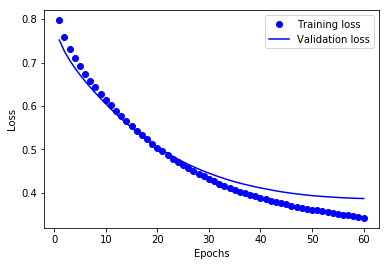

In [55]:
# Visualize the training process: loss function

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

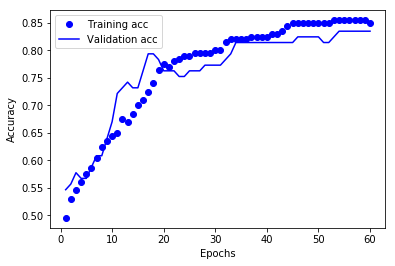

In [56]:
# Training & validation accuracy

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()